# Logistic Regression
#### when target value contain discrete or categorical value then  Logistic Regression algorithm will be used and its known as Classification  problem
formula: <br> expo(x) / 1+ expo(x)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
admission_data=pd.read_csv('Admissions_dq.csv')
admission_data.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


In [3]:
#check if any null values
admission_data.isnull().sum()

admit    0
gpa      0
gre      0
dtype: int64

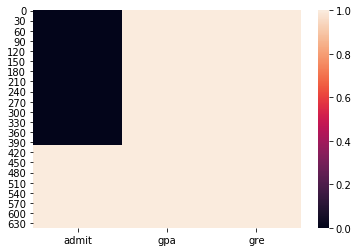

In [4]:
sns.heatmap(admission_data,vmin=0,vmax=1)

as per above image its clear than admit and Gender as discrete value so either admit or gender will be dependent variable. <br> 
Our goal to predict admission of student so lets consider on admit column as target column or dependent variable <br> now lets find out feature column
for predictions. Here we can focus on gre or gpa as feature column or independent variable to predict


In [5]:
admission_data[['gpa','gre']].describe()

,gpa,gre
count,644.000000,644.000000
mean,3.239936,612.923057
std,0.291907,76.637990
min,2.177100,390.363563
25%,3.045036,560.596793
50%,3.234650,612.104848
75%,3.448415,663.094697
max,4.000000,800.000000


as per above description, we can use gpa as feature as it is in range of 2 to 4 and easy to predict. lets do correlation to verify more

In [6]:
admission_data[['admit','gre','gpa']].corr()

,admit,gre,gpa
admit,1.000000,0.494981,0.312187
gre,0.494981,1.000000,-0.014440
gpa,0.312187,-0.014440,1.000000


gre and gpa are almost same correlation so lets focus on gpa for now 

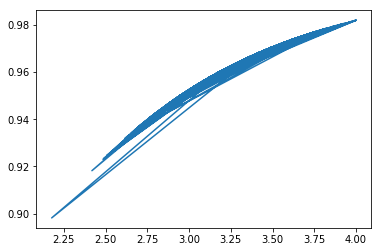

In [7]:
x= admission_data['gpa']
y= np.exp(x)/ (1 + np.exp(x))

plt.plot(x,y)
plt.show()

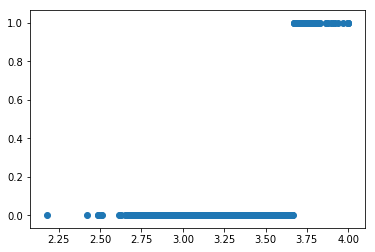

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

admission=admission_data.copy()
logistic_model = LogisticRegression()
logistic_model.fit(admission[["gpa"]], admission["admit"])
admission["predicted"] = logistic_model.predict(admission[["gpa"]])
plt.scatter(admission["gpa"], admission["predicted"])

plt.show()


In [9]:
confusion_matrix(admission["admit"], admission["predicted"])

array([[385,  15],
       [213,  31]], dtype=int64)

In [10]:
#admission

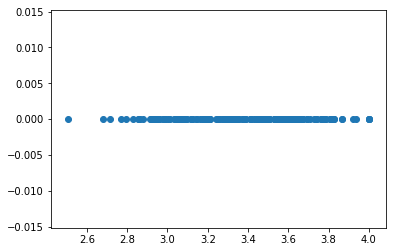

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

idx=int(len(admission_data)*0.7)
train=admission_data[0:idx].copy()
test=admission_data[idx:].copy()

lm = LogisticRegression()
lm.fit(train[["gpa"]], train["admit"])
test["predicted"] = lm.predict(test[["gpa"]])
#test
plt.scatter(test['gpa'],test['predicted'])
plt.show()

In [12]:
feature=3.865961
res=np.exp(feature)/(1+ np.exp(feature))
res

0.9794868164825351

In [13]:
ad=admission.append({'gpa':5.177277},ignore_index=True).copy()
ad=ad[ad['admit'].isnull()==True]
ad=ad.drop(['predicted'],axis=1)
ad

,admit,gpa,gre
644,NaN,5.177277,NaN


In [14]:
ad=ad.append({'gpa':1.177277},ignore_index=True).copy()
ad=ad.append({'gpa':2.177277},ignore_index=True).copy()
ad=ad.append({'gpa':3.177277},ignore_index=True).copy()
ad=ad.append({'gpa':4.177277},ignore_index=True).copy()
ad=ad.append({'gpa':6.177277},ignore_index=True).copy()
ad=ad.append({'gpa':7.177277},ignore_index=True).copy()
ad

,admit,gpa,gre
0,NaN,5.177277,NaN
1,NaN,1.177277,NaN
2,NaN,2.177277,NaN
3,NaN,3.177277,NaN
4,NaN,4.177277,NaN
5,NaN,6.177277,NaN
6,NaN,7.177277,NaN


In [15]:
ad['predicted']=logistic_model.predict(ad[["gpa"]])
ad

,admit,gpa,gre,predicted
0,NaN,5.177277,NaN,1
1,NaN,1.177277,NaN,0
2,NaN,2.177277,NaN,0
3,NaN,3.177277,NaN,0
4,NaN,4.177277,NaN,1
5,NaN,6.177277,NaN,1
6,NaN,7.177277,NaN,1


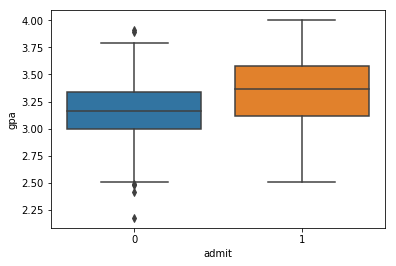

In [24]:
import seaborn as sns
sns.boxplot('admit','gpa',data=admission_data)

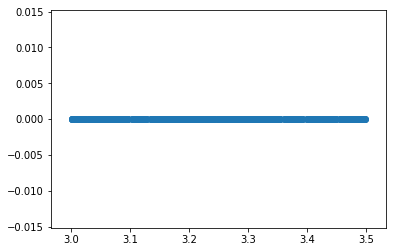

In [41]:
admit=admission_data.copy()
admit=admit[(admit['gpa']>=3.00) & (admit['gpa']<=3.50)]
admit.shape


#idx=int(len(admit)*0.7)
#train=admit[0:idx].copy()
#test=admit[idx:].copy()

lm = LogisticRegression()
#lm.fit(train[["gpa"]], train["admit"])
#test["predicted"] = lm.predict(test[["gpa"]])
#plt.scatter(test['gpa'],test['predicted'])


lm.fit(admit[["gpa"]], admit["admit"])
admit["predicted"] = lm.predict(admit[["gpa"]])
plt.scatter(admit['gpa'],admit['predicted'])

plt.show()

In [42]:
admit

,admit,gpa,gre,predicted
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
6,0,3.238972,667.472189,0
7,0,3.420177,561.713905,0
10,0,3.264341,636.453166,0
11,0,3.308623,604.405558,0
12,0,3.018922,567.714830,0
13,0,3.151834,503.307298,0
